In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #makes the display bars longer and spread out 100% across the screen width

In [4]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from db_queries import get_ids, get_outputs
import scipy.stats 
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages


In [3]:
!whoami
!date

nicoly
Wed Feb 24 18:28:14 PST 2021


No handles with labels found to put in legend.


alpha=1.2, beta=3.4666666666666672
median=65.45424942006015, mean=68.0
central 95% interval = (51.00109505168729, 97.91215690188781)




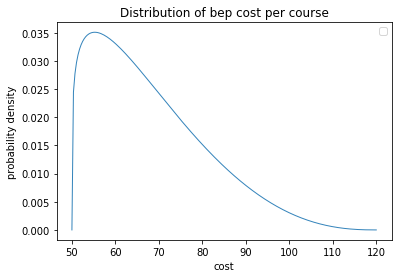

In [4]:
#beta distribution of bep cost

#min=loc and max=loc+scale
loc = 50
scale = 70
mean = 68

# divide median by scale to get median of unscaled beta distribution

a = 1.2
b = a*(1-((mean-loc)/(scale)))/((mean-loc)/(scale))
   
beta_dist = stats.beta(a, b, loc, scale)

x = np.linspace(loc, loc+scale, 200)
fig, ax = plt.subplots(1,1)
ax.set_title('Distribution of bep cost per course')
ax.set_xlabel('cost')
ax.set_ylabel('probability density')
ax.legend()

print(f'alpha={a}, beta={b}')
print(f'median={beta_dist.median()}, mean={beta_dist.mean()}')
print(f'central 95% interval = {beta_dist.interval(0.95)}')
print('\n')
    
# Test with alpha=1.5

ax.plot(x, beta_dist.pdf(x), lw=1, alpha=0.9)

In [5]:
give_me_a_bep_cost = scipy.stats.beta.rvs(a, b, loc, scale, size=100)
print(give_me_a_bep_cost)
print(len(give_me_a_bep_cost))

[ 67.32213033  79.75587818  76.32027228  78.81942733  66.33997811
  64.52324979  66.11350883  53.47094562  89.73322174  85.50605781
  97.43489316  67.69354673  54.98168409  83.65230584  60.69343235
  87.02200665  58.43557324  87.0603973   68.41372464  66.8990644
  54.93651459  60.44841883  64.93889233  63.53913611  70.17550652
  77.20291136  94.83699622  81.65807815  82.02209818  90.99361703
  66.019294    50.26468176  95.67748474  74.28616122  58.81052326
  63.71905795  92.35732859  77.8504352   51.197433    80.74791573
  79.68094773  53.94465231  92.90443335  55.07546294  50.68919368
  82.65710175  51.67048211  71.86196257  57.77448501  57.8317523
  71.84352633  53.31172123  90.92734893  54.05882942  72.99042706
  55.84364436  54.59991868  53.82717122  73.85964416  75.39428848
  52.22332207  68.84474013  70.38335064  54.89343619  95.5400443
  52.34533701  88.58693285  59.22411564  84.83598789  61.06950185
  74.12270201  63.23137972  66.88062869  59.53955777  69.29402032
  60.51366945

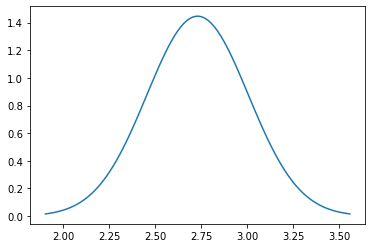

In [5]:
#cost of IFA 

import math

mu_ifa = 2.73
#variance = 0.1
#sigma = math.sqrt(variance)
sigma_ifa = (mu_ifa*1.2 - mu_ifa*0.8)/(2*1.98)

x = np.linspace(mu_ifa - 3*sigma_ifa, mu_ifa + 3*sigma_ifa, 100)
plt.plot(x, stats.norm.pdf(x, mu_ifa, sigma_ifa))
plt.show()


In [7]:
#cost of IFA

give_me_an_ifa_cost = np.random.normal(mu_ifa, sigma_ifa, size=100)
print(give_me_an_ifa_cost)
pd.Series(give_me_an_ifa_cost).describe(percentiles = [0.025,0.975])

[2.50684712 2.68643582 2.7980174  2.67776224 3.13474962 3.21125502
 2.55898791 2.69124285 3.32152097 2.78544003 2.89807128 2.44596008
 2.78953991 2.70641188 2.68502865 2.50218596 2.52612621 2.78225395
 2.83742062 1.85691421 3.22544608 2.66076538 2.4453341  2.54563909
 2.83511214 2.81721085 3.07842186 2.58438431 2.87186734 3.63795329
 2.67125447 2.87026849 3.13833558 2.66167762 2.225711   2.81262092
 2.52768545 3.2540688  2.85325266 3.00278544 2.98888817 2.27894274
 2.90569522 2.5946685  2.93976188 3.41672881 2.93451403 2.6727914
 2.71262452 2.98956817 2.87248469 3.24163837 2.50939477 2.0582722
 2.14516945 2.75835584 3.15410459 2.37350123 2.47767326 2.64312435
 2.70323608 2.54705606 2.64546565 2.51822764 2.56989982 2.96100765
 2.72703966 2.82131101 2.9855098  2.84114074 2.32465517 2.30168373
 2.84443928 2.49106354 2.70154666 2.51262893 2.66302332 2.7815587
 2.95666594 3.0178164  2.96056673 2.67847506 2.88753502 2.74879591
 2.49573029 3.27048794 2.86206398 2.81400219 2.5842367  2.6999798

count    100.000000
mean       2.750511
std        0.293105
min        1.856914
2.5%       2.183427
50%        2.739332
97.5%      3.297280
max        3.637953
dtype: float64

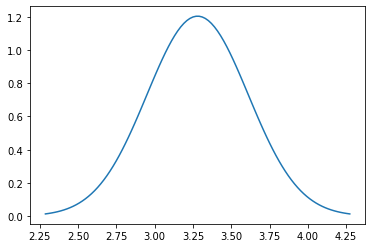

In [8]:
#cost of MMN

mu_mmn = 3.28
#variance = 
#sigma = math.sqrt(variance)
sigma_mmn = (mu_mmn*1.2 - mu_mmn*0.8)/(2*1.98)

x = np.linspace(mu_mmn - 3*sigma_mmn, mu_mmn + 3*sigma_mmn, 100)
plt.plot(x, stats.norm.pdf(x, mu_mmn, sigma_mmn))
plt.show()


In [9]:
give_me_an_mmn_cost = np.random.normal(mu_mmn, sigma_mmn, size=100)
print(give_me_an_mmn_cost)
pd.Series(give_me_an_mmn_cost).describe(percentiles = [0.025,0.975])

[3.23687009 3.15753108 3.35638292 3.12201632 3.68688158 2.84144785
 3.24833731 3.51909108 3.85843801 3.72529798 4.02622037 2.59785877
 3.35389809 2.98317403 2.78567382 3.03165587 2.95348421 3.84641146
 3.23423227 3.22375104 3.41181199 3.13339836 3.25988936 3.63958976
 3.5224851  3.10499719 2.95138539 3.59631676 3.35057679 3.01028366
 3.04932474 2.60776693 3.26885581 3.68128447 3.23339363 2.46502056
 3.25061352 3.52966123 3.77198447 3.06955013 3.81916904 3.18359036
 2.94005511 3.0931685  3.14352228 3.43319275 2.77943972 2.99678308
 2.93315923 3.83798838 3.74794315 3.29490222 3.50135618 2.41274799
 3.15454708 2.94417195 3.54074064 3.26148111 3.42517923 3.20905873
 3.18814939 3.56457418 3.42028062 3.29991669 2.96361142 3.25169349
 3.15614075 3.87578461 3.21587409 4.40434611 3.5964622  3.37174829
 2.70512427 3.48746663 3.57072409 3.59585312 3.20711197 3.11457541
 3.35567723 3.26147714 2.96248068 3.03358861 3.15819397 3.17915457
 3.48609826 3.05929615 3.39925846 3.34012744 3.60755567 3.5843

count    100.000000
mean       3.292648
std        0.350189
min        2.412748
2.5%       2.602565
50%        3.255791
97.5%      3.954763
max        4.404346
dtype: float64

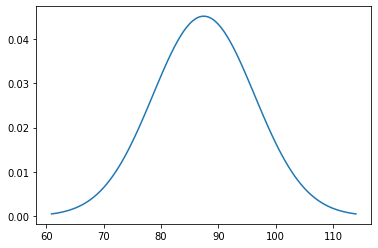

In [10]:
#cost of BEP

mu_bep = 87.45
#variance = 
#sigma = math.sqrt(variance)
sigma_bep = (mu_bep*1.2 - mu_bep*0.8)/(2*1.98)

x = np.linspace(mu_bep - 3*sigma_bep, mu_bep + 3*sigma_bep, 100)
plt.plot(x, stats.norm.pdf(x, mu_bep, sigma_bep))
plt.show()

# OBTAIN MODEL FILE PATHS

In [11]:
%cd '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/india/2020_12_18_16_23_36/count_data/'
%ls

/ihme/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/india/2020_12_18_16_23_36/count_data
birth_weight.csv    deaths.csv           population.csv         ylds.csv
birth_weight.hdf    deaths.hdf           population.hdf         ylds.hdf
cgf_categories.csv  gestational_age.csv  state_person_time.csv  ylls.csv
cgf_categories.hdf  gestational_age.hdf  state_person_time.hdf  ylls.hdf
cgf_z_scores.csv    person_time.csv      transition_count.csv
cgf_z_scores.hdf    person_time.hdf      transition_count.hdf


In [12]:
#5a
output_dirs001 = ['/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/india/2020_12_18_16_23_36/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/pakistan/2020_12_20_16_30_49/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/mali/2020_12_19_10_29_20/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5a/tanzania/2020_12_19_10_32_34/count_data/']

#5b
output_dirs002 = ['/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/india/2020_12_18_16_04_38/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/pakistan/2020_12_18_16_16_04/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/mali/2020_12_18_16_13_32/count_data/',
                     '/share/costeffectiveness/results/vivarium_gates_bep/winter_2020/5b/tanzania/2020_12_18_16_18_26/count_data/']


#location labels
locations = ['India','Pakistan','Mali','Tanzania']

#use in sort_values to make custum sort list. I sorted by region. 
sorter = ['India','Pakistan','Mali','Tanzania']
sorterIndex = dict(zip(sorter,range(len(sorter))))

!whoami
!date

nicoly
Wed Feb 24 18:28:16 PST 2021


# ----------------------------------------------------------------------------------------------
# MASTER_AVG table - table with all desired output variable means
#  ---------------------------------------------------------------------------------------------

In [13]:
# ALL COUNTRIES, run001 and run002 merge (baseline, mmn, bep_scale_up_hd, bep_universal_hd)

master_avg = pd.DataFrame()
master_draws = pd.DataFrame()
master_counts = pd.DataFrame()

for i in list(range(len(output_dirs001))):

  #count data set for ylls
    #run1 bep_hd_i
    ylls_001 = pd.read_hdf(output_dirs001[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
    
    #run2 bep_ce
    ylls_002 = pd.read_hdf(output_dirs002[i] + 'ylls.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylls'})
   
 
    #APPEND ALL
    ylls = ylls_001.append([ylls_002])
    
    #count data set for ylds
    ylds_001 = pd.read_hdf(output_dirs001[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
   
    ylds_002 = pd.read_hdf(output_dirs002[i] + 'ylds.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'ylds'})
    
  
    #APPEND ALL
    ylds = ylds_001.append([ylds_002])
    
    #create DALYs by adding ylls and ylds
    dalys = ylls.merge(ylds, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys['dalys'] = dalys['ylls'] + dalys['ylds']
    dalys = dalys.drop(columns=['ylls','ylds'])
    
    #count data set for person_time
    person_time_001 = pd.read_hdf(output_dirs001[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
  
    
    person_time_002 = pd.read_hdf(output_dirs002[i] + 'person_time.hdf').reset_index().groupby(['input_draw','scenario']).sum().reset_index().drop(columns='index').rename(columns={'value':'person_time'})
    
  
    person_time = person_time_001.append([person_time_002])
    
    #count data set for population numbers
    treatment_001 = pd.read_hdf(output_dirs001[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
  
    treatment_002 = pd.read_hdf(output_dirs002[i] + 'population.hdf').reset_index().groupby(['input_draw','scenario','treatment_group','measure']).sum().reset_index().drop(columns='index').rename(columns={'value':'population'})
    
  
    
    treatment = treatment_001.append([treatment_002])
    
    treatment = treatment.where(treatment['measure'] == 'total_population').dropna()
    treatment = pd.pivot_table(treatment, index=['input_draw','scenario'], columns='treatment_group', values='population').reset_index()
    treatment = treatment.rename(columns={'all':'total_population',
                               'bep':'bep_population',
                               'ifa':'ifa_population',
                               'mmn':'mmn_population',
                               'none':'untreated_population'})
    
    dalys_pt = dalys.merge(person_time, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    dalys_tot = dalys_pt.merge(treatment, right_on=['input_draw','scenario'], left_on=['input_draw','scenario'])
    
    #DALYS_TOT TABLE
    count = dalys_tot
    
    #MASTER_COUNTS
    
    count['location'] = locations[i]
    master_counts = master_counts.append(count)
    
    #master_counts consists of columns: 
    # -input_draw
    # -scenarios
    # -dalys
    # -person-time
    # -total_pop
    # -bep_pop
    # -ifa_pop
    # -mmn_pop
    # -untreated_pop

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
# USING DALYS_TOTS, look up scenario names
# dalys_tots['scenario']
#'baseline'
#'mmn_scale_up'
#'bep_ce_scale_up'
#'bep_ce_targeted_scale_up',

#'bep_hd_scale_up_i'
#'bep_hd_scale_up_ii'
#'bep_hd_scale_up_iii'

#'bep_hd_targeted_scale_up_i'     
#'bep_hd_targeted_scale_up_ii'
#'bep_hd_targeted_scale_up_iii'

    # add cost data
    
    
# ---A) COST FOR BASELINE SCENARIO
    
    #1. select for baseline row
    dalys_baseline = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'baseline').dropna().drop(columns='scenario'))
    #2. create cost column
    np.random.seed(12345)
    dalys_baseline['cost'] = np.random.normal(mu_ifa, sigma_ifa, size=len(dalys_baseline['ifa_population'])) * dalys_baseline['ifa_population']
    #3. drop person-time
    #dalys_baseline = dalys_baseline.drop(columns='person_time')   #dalys are out of 100,000 births  
    
# ---B) COST FOR MMN SCENARIO
    
    #1. select for mmn row
    dalys_mmn = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'mmn_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_mmn['cost'] = np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_mmn['mmn_population'])) * dalys_mmn['mmn_population'] 
    
    #3. drop person-time
    dalys_mmn = dalys_mmn.drop(columns='person_time')  #dalys are out of 100,000 births
    
# ---C) cost for CE UNIVERSAL SCENARIO (current evidence effect)
    
    #1. select for bep_ce_scale_up (universal) row
    dalys_bep_ce_universal = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_ce_universal['cost_bep_ce_universal'] =  dalys_bep_ce_universal['bep_population'] * np.random.normal(mu_bep, sigma_bep, size=len(dalys_bep_ce_universal['bep_population']))
    dalys_bep_ce_universal['cost_bep_ce_universal_avg'] = (60.42) *  dalys_bep_ce_universal['bep_population']
    dalys_bep_ce_universal['cost_bep_ce_universal_low'] = (51.42) *  dalys_bep_ce_universal['bep_population'] 
    dalys_bep_ce_universal['cost_bep_ce_universal_high'] = (120.42) *  dalys_bep_ce_universal['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_ce_universal = dalys_bep_ce_universal.drop(columns='person_time') #dalys are out of 100,000 births
    
    
# ---D) cost for CE TARGETED scenario (current evidence effect)
    
    #1. select for targeted row
    dalys_bep_ce_targeted = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_ce_targeted_scale_up').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column
    np.random.seed(12345)
    dalys_bep_ce_targeted['cost_bep_ce_targeted'] = dalys_bep_ce_targeted['bep_population'] * np.random.normal(mu_bep, sigma_bep, size=len(dalys_bep_ce_universal['bep_population'])) +  (dalys_bep_ce_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population'])))
    
    dalys_bep_ce_targeted['cost_bep_ce_targeted_avg'] = 60.42 * dalys_bep_ce_targeted['bep_population'] + dalys_bep_ce_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))
    dalys_bep_ce_targeted['cost_bep_ce_targeted_low'] = 51.42 * dalys_bep_ce_targeted['bep_population'] +  dalys_bep_ce_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))
    dalys_bep_ce_targeted['cost_bep_ce_targeted_high'] = 120.42 * dalys_bep_ce_targeted['bep_population'] + dalys_bep_ce_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))
    #3. drop person time, no need for pt                                    
    dalys_bep_ce_targeted = dalys_bep_ce_targeted.drop(columns='person_time') #dalys are out of 100,000 births
    

    # ---E) COST FOR HD universal SCENARIO hopes and dreams effect
    
#i  1. select for bep hd universal row
    dalys_bep_hd_universal = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_scale_up').dropna().drop(columns='scenario'))
    
    #2. create cost column
    np.random.seed(12345)
    dalys_bep_hd_universal['cost_bep_hd_universal'] =  dalys_bep_hd_universal['bep_population'] * np.random.normal(mu_bep, sigma_bep, size=len(dalys_bep_hd_universal['bep_population']))
    dalys_bep_hd_universal['cost_bep_hd_universal_avg'] = 60.42 *  dalys_bep_hd_universal['bep_population']
    dalys_bep_hd_universal['cost_bep_hd_universal_low'] = 51.42 *  dalys_bep_hd_universal['bep_population'] 
    dalys_bep_hd_universal['cost_bep_hd_universal_high'] = 120.42 *  dalys_bep_hd_universal['bep_population'] 
    
    #3. drop person time, no need for pt
    dalys_bep_hd_universal =  dalys_bep_hd_universal.drop(columns='person_time') #dalys are out of 100,000 births

      
    # ---F) cost for HD TARGETED scenarios 
    
#i  1. select for targeted row
    dalys_bep_hd_targeted = pd.DataFrame.copy(dalys_tot.where(dalys_tot['scenario'] == 'bep_hd_targeted_scale_up').dropna().drop(columns='scenario'))
    
    #2. create targeted cost column for hd
    np.random.seed(12345)
    dalys_bep_hd_targeted['cost_bep_hd_targeted'] = dalys_bep_hd_targeted['bep_population'] * np.random.normal(mu_bep, sigma_bep, size=len(dalys_bep_hd_targeted['bep_population'])) + (dalys_bep_hd_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_hd_targeted['bep_population'])))
    dalys_bep_hd_targeted['cost_bep_hd_targeted_avg'] = (60.42 * dalys_bep_hd_targeted['bep_population']) + dalys_bep_hd_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))  
    dalys_bep_hd_targeted['cost_bep_hd_targeted_low'] = (60.42* dalys_bep_hd_targeted['bep_population']) + dalys_bep_hd_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))
    dalys_bep_hd_targeted['cost_bep_hd_targeted_high'] = (60.42 * dalys_bep_hd_targeted['bep_population']) + dalys_bep_hd_targeted['mmn_population'] * np.random.normal(mu_mmn, sigma_mmn, size=len(dalys_bep_ce_targeted['bep_population']))

    #3. drop person time, no need for pt                                    
    dalys_bep_hd_targeted = dalys_bep_hd_targeted.drop(columns='person_time') #dalys are out of 100,000 births
    
        
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
    # merging the cost tables back together                                                
    #scenario 1 is baseline
    dalys_scenariosB = dalys_baseline.merge(dalys_mmn, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_mmn']) #mmn
    dalys_scenariosC = dalys_baseline.merge(dalys_bep_ce_universal, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_universal']) #bep current evidence universal bep_ce
    dalys_scenariosD = dalys_baseline.merge(dalys_bep_ce_targeted, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_ce_targeted'])
    
    dalys_scenariosEi = dalys_baseline.merge(dalys_bep_hd_universal, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_universal'])
 
    
    dalys_scenariosFi = dalys_baseline.merge(dalys_bep_hd_targeted, right_on=['input_draw'], left_on=['input_draw'], suffixes=['_baseline','_bep_hd_targeted'])
    
   
    dalys_scenarios1  = dalys_scenariosB.merge(dalys_scenariosC, right_on=['input_draw'], left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios2  = dalys_scenariosD.merge(dalys_scenarios1, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios3  = dalys_scenariosEi.merge(dalys_scenarios2, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])
    dalys_scenarios   = dalys_scenariosFi.merge(dalys_scenarios3, right_on=['input_draw'],  left_on=['input_draw'], suffixes=['','_drop'])   
    
    dalys_scenarios  = dalys_scenarios.drop(columns=[c for c in dalys_scenarios.columns if 'drop' in c])
    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #calculating DALYs averted and cost diff relative to BASELINE
    
    #-------- RELATIVE TO BASELINE ---------#
    
    # B: mmn vs baseline
    dalys_scenarios['dalys_averted_mmn'] = dalys_scenarios['dalys_mmn'] - dalys_scenarios['dalys_baseline']
    dalys_scenarios['cost_diff_mmn'] = dalys_scenarios['cost_mmn'] - dalys_scenarios['cost_baseline']
    
    #  C: bep ce_universal vs baseline
    dalys_scenarios['dalys_averted_bep_ce_universal'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_universal
    dalys_scenarios['cost_diff_bep_ce_universal'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_avg'] = dalys_scenarios['cost_bep_ce_universal_avg'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_low'] = dalys_scenarios['cost_bep_ce_universal_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_universal_high'] = dalys_scenarios['cost_bep_ce_universal_high'] - dalys_scenarios['cost_baseline']
    
    #  D: bep ce_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_ce_targeted'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_baseline'] #dalys_bep_ce_targeted 
    dalys_scenarios['cost_diff_bep_ce_targeted'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_low'] = dalys_scenarios['cost_bep_ce_targeted_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_ce_targeted_high'] = dalys_scenarios['cost_bep_ce_targeted_high'] - dalys_scenarios['cost_baseline']
    
    #  E: bep hd_universal vs baseline 
    dalys_scenarios['dalys_averted_bep_hd_universal'] = dalys_scenarios['dalys_bep_hd_universal'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_universal_i
    dalys_scenarios['cost_diff_bep_hd_universal'] = dalys_scenarios['cost_bep_hd_universal'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_avg'] = dalys_scenarios['cost_bep_hd_universal_avg'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_low'] = dalys_scenarios['cost_bep_hd_universal_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_universal_high'] = dalys_scenarios['cost_bep_hd_universal_high'] - dalys_scenarios['cost_baseline']
    
    #  F: bep hd_targeted vs baseline
    dalys_scenarios['dalys_averted_bep_hd_targeted'] = dalys_scenarios['dalys_bep_hd_targeted'] - dalys_scenarios['dalys_baseline']  #dalys_bep_hd_targeted_i
    dalys_scenarios['cost_diff_bep_hd_targeted'] = dalys_scenarios['cost_bep_hd_targeted'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_low'] = dalys_scenarios['cost_bep_hd_targeted_low'] - dalys_scenarios['cost_baseline']
    dalys_scenarios['cost_diff_bep_hd_targeted_high'] = dalys_scenarios['cost_bep_hd_targeted_high'] - dalys_scenarios['cost_baseline']
    

    #-------- RELATIVE TO MMN ---------#
    
    # C and E: bep ce/hd UNIVERSAL relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_universal'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_universal'] - dalys_scenarios['cost_mmn']
    
    dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['dalys_bep_hd_universal'] - dalys_scenarios['dalys_mmn']
  
    
    dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['cost_bep_hd_universal'] - dalys_scenarios['cost_mmn']
 
    
    # D and F: bep ce/hd TARGETED relative to mmn
    dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['dalys_bep_ce_targeted'] - dalys_scenarios['dalys_mmn']
    dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_bep_ce_targeted'] - dalys_scenarios['cost_mmn']
    
    dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['dalys_bep_hd_targeted'] - dalys_scenarios['dalys_mmn']
   
       
    dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['cost_bep_hd_targeted'] - dalys_scenarios['cost_mmn']
    

    
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
   
    #ICER REL TO BASELINE
    
    #MMN
    dalys_scenarios['icer_mmn'] = dalys_scenarios['cost_diff_mmn'] / dalys_scenarios['dalys_averted_mmn']
    
    # _ce_universal
    dalys_scenarios['icer_bep_ce_universal'] = dalys_scenarios['cost_diff_bep_ce_universal'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_low'] = dalys_scenarios['cost_diff_bep_ce_universal_low'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    dalys_scenarios['icer_bep_ce_universal_high'] = dalys_scenarios['cost_diff_bep_ce_universal_high'] / dalys_scenarios['dalys_averted_bep_ce_universal']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted'] = dalys_scenarios['cost_diff_bep_ce_targeted'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_low'] = dalys_scenarios['cost_diff_bep_ce_targeted_low'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    dalys_scenarios['icer_bep_ce_targeted_high'] = dalys_scenarios['cost_diff_bep_ce_targeted_high'] / dalys_scenarios['dalys_averted_bep_ce_targeted']
    
    # _hd_universal
    dalys_scenarios['icer_bep_hd_universal'] = dalys_scenarios['cost_diff_bep_hd_universal'] / dalys_scenarios['dalys_averted_bep_hd_universal']
    dalys_scenarios['icer_bep_hd_universal_low'] = dalys_scenarios['cost_diff_bep_hd_universal_low'] / dalys_scenarios['dalys_averted_bep_hd_universal']
    dalys_scenarios['icer_bep_hd_universal_high'] = dalys_scenarios['cost_diff_bep_hd_universal_high'] / dalys_scenarios['dalys_averted_bep_hd_universal']
        
    # _hd_targeted
    dalys_scenarios['icer_bep_hd_targeted'] = dalys_scenarios['cost_diff_bep_hd_targeted'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    dalys_scenarios['icer_bep_hd_targeted_low'] = dalys_scenarios['cost_diff_bep_hd_targeted_low'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    dalys_scenarios['icer_bep_hd_targeted_high'] = dalys_scenarios['cost_diff_bep_hd_targeted_high'] / dalys_scenarios['dalys_averted_bep_hd_targeted']
    
  
    
    #ICER REL TO MMN
        
    #  _ce_universal
    dalys_scenarios['icer_bep_ce_universal_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_universal_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_universal_rel_to_mmn']
    
    # _ce_targeted
    dalys_scenarios['icer_bep_ce_targeted_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_ce_targeted_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_ce_targeted_rel_to_mmn']
    
    # _hd_universal
    dalys_scenarios['icer_bep_hd_universal_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_hd_universal_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_hd_universal_rel_to_mmn']
    
 
    # _hd_targeted
    dalys_scenarios['icer_bep_hd_targeted_rel_to_mmn'] = dalys_scenarios['cost_diff_bep_hd_targeted_rel_to_mmn'] / dalys_scenarios['dalys_averted_bep_hd_targeted_rel_to_mmn']
    
    
    dalys_scenarios = dalys_scenarios.set_index(['input_draw'])
    dalys_scenarios['location'] = locations[i]
    
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#  
    #appending each country (dalys_scenarios) together to create master_draws (keep master draws as is)
    
    master_draws = master_draws.append(dalys_scenarios.reset_index())

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
  # USING DALYS_SCENARIOS  
    
    #per country 
    dalys_prep = dalys_scenarios.reset_index().drop(columns=['input_draw','person_time']) #no need for person time, drop
    
    #averaging over the 50 draws
    dalys_mean = pd.DataFrame(dalys_prep.mean()) #mean over all 50 input draw rows
    dalys_min = pd.DataFrame(dalys_prep.quantile(0.025))
    dalys_max = pd.DataFrame(dalys_prep.quantile(0.975))
    
    per_pt1 = dalys_mean.merge(dalys_min, right_index=True, left_index=True)
    #per_pt2 = dalys_mean.merge(dalys_max, right_index=True, left_index=True)
    
    final_per_pt = per_pt1.merge(dalys_max, right_index=True, left_index=True)#, suffixes=['','_drop'])
    final_per_pt = final_per_pt.rename(columns={0.0:'mean', 0.025:'min', 0.975:'max'})#.drop(columns='0.0_mean_drop')
    final_per_pt = final_per_pt.reset_index()
    
    final_per_pt['location'] = locations[i]
    
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    #appending all 4 countries    
    master_avg = master_avg.append(final_per_pt)
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#
    
# perform lexicographic sort on a dataframe  
master_avg['location_rank'] = master_avg['location'].map(sorterIndex)
master_avg = master_avg.sort_values(by='location_rank')

#master_avg.drop('location_rank', 1, inplace = True)
master_avg.head()
    

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.252665e+05,3.072293e+05,3.448891e+05,India,0
72,cost_diff_bep_hd_targeted,1.301213e+06,1.081947e+06,1.528895e+06,India,0
71,dalys_averted_bep_hd_targeted,-1.916910e+04,-2.444968e+04,-1.494701e+04,India,0
70,cost_diff_bep_hd_universal_high,9.467739e+06,9.369492e+06,9.578304e+06,India,0
69,cost_diff_bep_hd_universal_low,3.988989e+06,3.946338e+06,4.037878e+06,India,0


In [14]:
master_avg['index'].unique()

array(['dalys_baseline', 'cost_diff_bep_hd_targeted',
       'dalys_averted_bep_hd_targeted', 'cost_diff_bep_hd_universal_high',
       'cost_diff_bep_hd_universal_low', 'cost_diff_bep_hd_universal_avg',
       'cost_diff_bep_hd_universal', 'dalys_averted_bep_hd_universal',
       'cost_diff_bep_ce_targeted_high', 'cost_diff_bep_ce_targeted_low',
       'cost_diff_bep_ce_targeted', 'dalys_averted_bep_ce_targeted',
       'cost_diff_bep_ce_universal_high',
       'cost_diff_bep_ce_universal_low', 'cost_diff_bep_ce_universal_avg',
       'cost_diff_bep_ce_universal', 'dalys_averted_bep_ce_universal',
       'cost_diff_mmn', 'dalys_averted_mmn', 'cost_bep_ce_universal_high',
       'cost_bep_ce_universal_low', 'cost_bep_ce_universal_avg',
       'cost_diff_bep_hd_targeted_low',
       'dalys_averted_bep_ce_universal_rel_to_mmn',
       'cost_diff_bep_ce_universal_rel_to_mmn',
       'dalys_averted_bep_hd_universal_rel_to_mmn',
       'icer_bep_hd_targeted_rel_to_mmn',
       'icer_bep_hd_

In [15]:
dalys_tot['scenario'].unique()

array(['baseline', 'bep_ce_scale_up', 'bep_ce_targeted_scale_up',
       'mmn_scale_up', 'bep_hd_scale_up', 'bep_hd_targeted_scale_up'],
      dtype=object)

# ===================================================

# MASTER_DRAWS with draw-level data points for GG plotting

# ===================================================

In [16]:
# CHECK OUT MASTER DRAWS

# master_draws_t = master_draws.T
master_draws.to_csv('/homes/nicoly/bep_results_data/winter_ouputs_bydraws.csv', index=False)
# master_draws_t.to_csv('/homes/nicoly/bep_results_data/ouputs_bydraws_t.csv', index=False)

# master_draws_t.head()

# TESTING AND EXPLORING DATA



In [17]:
master_avg_india = master_avg.where(master_avg['location'] == 'India').dropna()
master_avg_india.head()

,index,mean,min,max,location,location_rank
0,dalys_baseline,3.252665e+05,3.072293e+05,3.448891e+05,India,0.0
72,cost_diff_bep_hd_targeted,1.301213e+06,1.081947e+06,1.528895e+06,India,0.0
71,dalys_averted_bep_hd_targeted,-1.916910e+04,-2.444968e+04,-1.494701e+04,India,0.0
70,cost_diff_bep_hd_universal_high,9.467739e+06,9.369492e+06,9.578304e+06,India,0.0
69,cost_diff_bep_hd_universal_low,3.988989e+06,3.946338e+06,4.037878e+06,India,0.0


In [18]:
#all items are listed in index

dalys_scenarios_list =  dalys_scenarios.T
dalys_scenarios_list.reset_index().head()


input_draw,index,3.0,8.0,21.0,29.0,35.0,50.0,55.0,78.0,100.0,...,860.0,871.0,891.0,903.0,913.0,946.0,948.0,954.0,973.0,990.0
0,dalys_baseline,430393,390918,438340,472109,378798,348318,457543,438835,417043,...,336999,440192,373901,356838,424200,427625,465801,393588,462593,380181
1,person_time,191870,192753,191812,191209,192917,193444,191453,191817,192185,...,193673,191736,193005,193256,192067,191924,191229,192708,191438,192861
2,total_population_baseline,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
3,bep_population_baseline,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ifa_population_baseline,21285,20535,24758,22620,20372,20442,20149,20344,21563,...,22171,22099,21190,21739,20690,19639,20034,21246,23193,20015


In [19]:
dalys_tot['scenario'].value_counts()

bep_ce_targeted_scale_up    100
baseline                    100
bep_hd_scale_up             100
mmn_scale_up                100
bep_ce_scale_up             100
bep_hd_targeted_scale_up    100
Name: scenario, dtype: int64



# NUMBER SUPPLEMENTED IN SCENARIOS   





In [20]:
# number of treated individuals in each scenario/location per 100,000 births

treated_numbers = master_counts
treated_numbers['treated'] = (treated_numbers['bep_population']+treated_numbers['ifa_population']+treated_numbers['mmn_population'])/treated_numbers['total_population']*100_000
treated_counts = treated_numbers.groupby(['scenario','location']).mean().reset_index()
treated_counts = treated_counts[['scenario','location','treated']]
treated_counts.head()

,scenario,location,treated
0,baseline,India,34255.31
1,baseline,Mali,23419.30
2,baseline,Pakistan,24852.43
3,baseline,Tanzania,21094.64
4,bep_ce_scale_up,India,79402.17


# =====================

# ICER SCATTER PLOTS

# =====================

# scenarios: mmn, bep_ce_universal, bep_ce_targeted, bep_hd_universal, bep_hd_targeted

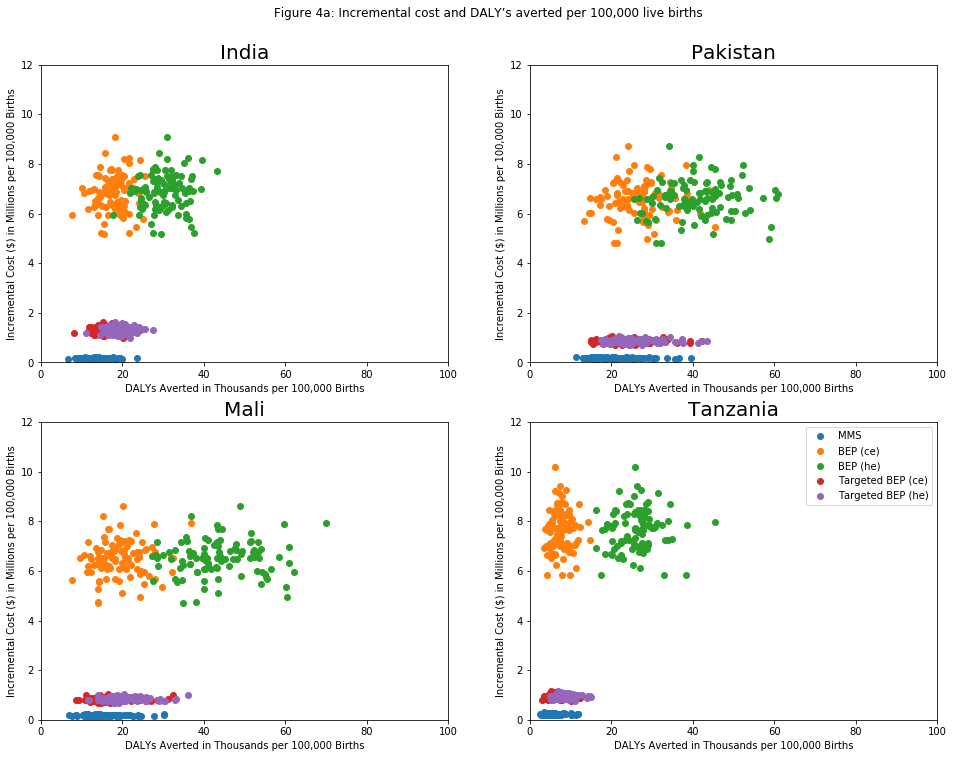

In [51]:
fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()

scenarios_names = ['MMS',
                   'BEP (ce)', 
                   'BEP (he)',
                   'Targeted BEP (ce)',
                   'Targeted BEP (he)']


#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,0].scatter(india['dalys_averted_mmn']*(-1)/1_000, india['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal']/1_000_000)

#bep hd_universal
axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal']/1_000_000)

#bep ce_targeted
axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_targeted
axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted']/1_000_000)

#cost bounds for BEP
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,100)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,1].scatter(pakistan['dalys_averted_mmn']*(-1)/1_000, pakistan['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal']/1_000_000)

#bep hd_universal
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal']/1_000_000)

#bep ce_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_targeted
axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted']/1_000_000)


axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,100)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,0].scatter(mali['dalys_averted_mmn']*(-1)/1_000, mali['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal']/1_000_000)

#bep hd_universal
axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal']/1_000_000)

#bep ce_targeted
axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_targeted
axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted']/1_000_000)

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,100)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,1].scatter(tanzania['dalys_averted_mmn']*(-1)/1_000, tanzania['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal']/1_000_000)

#bep hd_universal
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal']/1_000_000)

#bep ce_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_targeted
axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted']/1_000_000)

axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,100)
axs[1,1].set_ylim(0,12)


for ax in axs.flat:
    ax.set(xlabel='DALYs Averted in Thousands per 100,000 Births', 
           ylabel='Incremental Cost ($) in Millions per 100,000 Births')
    #ax.label_outer()

plt.legend(scenarios_names, prop={'size': 10})
#plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)

# plt.subplots_adjust(right=2.2, top=2.4)
# fig2 = plt(figsize=(9, 11))

#plt.subplots_adjust(right=2, top=2)
plt.suptitle('Figure 4a: Incremental cost and DALY’s averted per 100,000 live births', x=1.16, y=2.6)
# plt.suptitle('All Cause Mortality Rate (per person year)',x=0.55, y=1)

#fig.savefig('/homes/nicoly/bep_results_data/icer_scatter_plot.png', bbox_inches = 'tight')    
fig.savefig('/homes/nicoly/bep_results_data/Figure_4a_icer_scatter_plot.pdf', bbox_inches = 'tight')    


# --------------------------------------
# COST DIFFERENCE ONLY
# --------------------------------------

In [23]:
india = master_draws.where(master_draws['location'] == 'India').dropna()
india.head()

,input_draw,dalys_baseline,person_time,total_population_baseline,bep_population_baseline,ifa_population_baseline,mmn_population_baseline,untreated_population_baseline,location_baseline,cost,...,icer_bep_hd_universal_low,icer_bep_hd_universal_high,icer_bep_hd_targeted,icer_bep_hd_targeted_low,icer_bep_hd_targeted_high,icer_bep_ce_universal_rel_to_mmn,icer_bep_ce_targeted_rel_to_mmn,icer_bep_hd_universal_rel_to_mmn,icer_bep_hd_targeted_rel_to_mmn,location
0,3.0,322427.572855,193360.747433,100000.0,0.0,35192.0,0.0,64808.0,India,94087.582583,...,-134.063863,-318.185284,-71.750411,-56.329461,-55.308571,-1627.487102,-373.113204,-379.405700,-226.767703,India
1,8.0,330052.124135,193260.150582,100000.0,0.0,33027.0,0.0,66973.0,India,94525.660327,...,-132.342848,-314.130209,-89.902244,-60.306824,-62.798128,-987.038424,-340.902447,-347.731944,-198.554714,India
2,21.0,310214.519550,193675.227926,100000.0,0.0,39783.0,0.0,60217.0,India,102909.106465,...,-141.714889,-336.818246,-61.645170,-46.038326,-46.810629,-3120.799887,-709.884528,-559.348291,-292.810932,India
3,29.0,346508.977417,192982.280630,100000.0,0.0,36533.0,0.0,63467.0,India,94136.523139,...,-109.856371,-260.734737,-60.551982,-46.613674,-47.026426,-728.502195,-251.812770,-257.398228,-149.168018,India
4,35.0,328689.876939,193270.420260,100000.0,0.0,33529.0,0.0,66471.0,India,109709.532940,...,-127.891189,-304.257799,-79.417397,-48.696939,-49.818200,-1181.094716,-348.657204,-457.651491,-216.423085,India


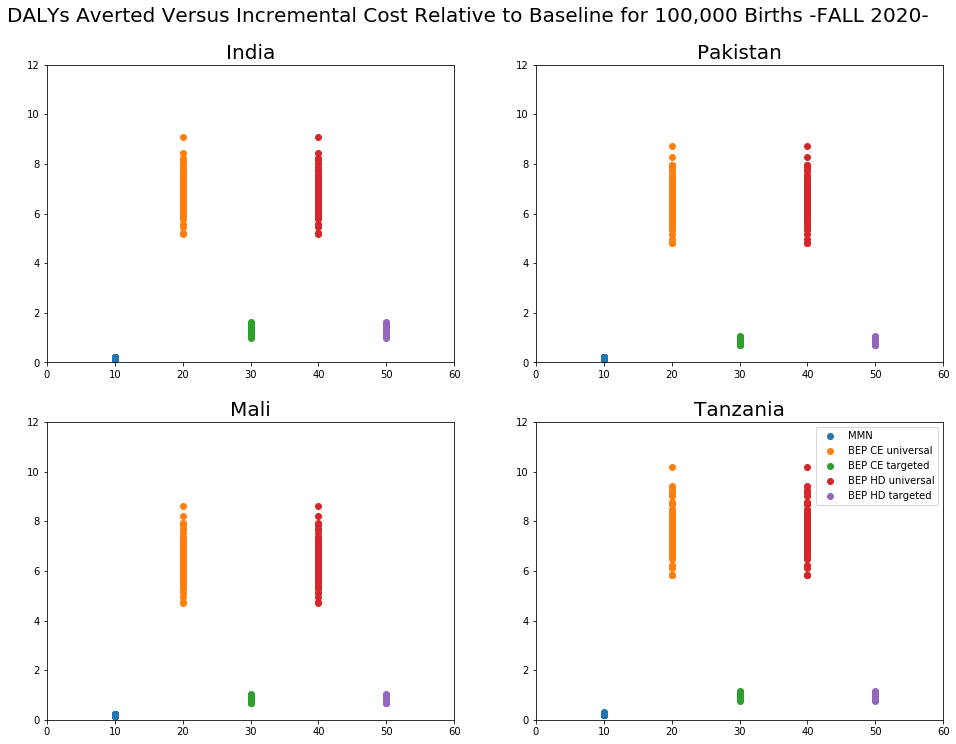

In [24]:
fig, axs = plt.subplots(2,2)

india = master_draws.where(master_draws['location'] == 'India').dropna()
india['10'] = 10
india['20'] = 20
india['30'] = 30
india['40'] = 40
india['50'] = 50

pakistan = master_draws.where(master_draws['location'] == 'Pakistan').dropna()
pakistan['10'] = 10
pakistan['20'] = 20
pakistan['30'] = 30
pakistan['40'] = 40
pakistan['50'] = 50

mali = master_draws.where(master_draws['location'] == 'Mali').dropna()
mali['10'] = 10
mali['20'] = 20
mali['30'] = 30
mali['40'] = 40
mali['50'] = 50

tanzania = master_draws.where(master_draws['location'] == 'Tanzania').dropna()
tanzania['10'] = 10
tanzania['20'] = 20
tanzania['30'] = 30
tanzania['40'] = 40
tanzania['50'] = 50

#------------------------INDIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,0].scatter(india['10'], india['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[0,0].scatter(india['20'], india['cost_diff_bep_ce_universal']/1_000_000)

#bep ce_targeted
axs[0,0].scatter(india['30'], india['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal

axs[0,0].scatter(india['40'], india['cost_diff_bep_hd_universal']/1_000_000)

#bep hd_targeted

axs[0,0].scatter(india['50'], india['cost_diff_bep_hd_targeted']/1_000_000)

#cost bounds for BEP
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_universal']*(-1)/1_000, india['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_ce_targeted']*(-1)/1_000, india['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_universal']*(-1)/1_000, india['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,0].scatter(india['dalys_averted_bep_hd_targeted']*(-1)/1_000, india['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,0].set_title('India',fontsize=20)
axs[0,0].set_xlim(0,60)
axs[0,0].set_ylim(0,12)

#------------------------PAKISTAN---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[0,1].scatter(pakistan['10'], pakistan['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[0,1].scatter(pakistan['20'], pakistan['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[0,1].scatter(pakistan['30'], pakistan['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[0,1].scatter(pakistan['40'], pakistan['cost_diff_bep_hd_universal']/1_000_000)

#bep hd_targeted
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[0,1].scatter(pakistan['50'], pakistan['cost_diff_bep_hd_targeted']/1_000_000)

#BEP cost bounds
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_universal']*(-1)/1_000, pakistan['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_ce_targeted']*(-1)/1_000, pakistan['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_universal']*(-1)/1_000, pakistan['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[0,1].scatter(pakistan['dalys_averted_bep_hd_targeted']*(-1)/1_000, pakistan['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[0,1].set_title('Pakistan',fontsize=20)
axs[0,1].set_xlim(0,60)
axs[0,1].set_ylim(0,12)


#------------------------MALI---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,0].scatter(mali['10'], mali['cost_diff_mmn']/1_000_000)

#bep ce_universal
axs[1,0].scatter(mali['20'], mali['cost_diff_bep_ce_universal']/1_000_000)

#bep ce_targeted
axs[1,0].scatter(mali['30'], mali['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
axs[1,0].scatter(mali['40'], mali['cost_diff_bep_hd_universal']/1_000_000)

#bep hd_targeted
axs[1,0].scatter(mali['50'], mali['cost_diff_bep_hd_targeted']/1_000_000)

#BEP COST BOUNDS
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_universal']*(-1)/1_000, mali['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_ce_targeted']*(-1)/1_000, mali['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_universal']*(-1)/1_000, mali['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
# axs[1,0].scatter(mali['dalys_averted_bep_hd_targeted']*(-1)/1_000, mali['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,0].set_title('Mali',fontsize=20)
axs[1,0].set_xlim(0,60)
axs[1,0].set_ylim(0,12)


#------------------------TANZANIA---------------------------------------------------------------------------------------------------------------------------------------#

#mmn 
axs[1,1].scatter(tanzania['10'], tanzania['cost_diff_mmn']/1_000_000)
#bep ce_universal
axs[1,1].scatter(tanzania['20'], tanzania['cost_diff_bep_ce_universal']/1_000_000)
#bep ce_targeted
axs[1,1].scatter(tanzania['30'], tanzania['cost_diff_bep_ce_targeted']/1_000_000)

#bep hd_universal
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_ii']/1_000_000)
axs[1,1].scatter(tanzania['40'], tanzania['cost_diff_bep_hd_universal']/1_000_000)

#bep hd_targeted
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_i']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_i']/1_000_000)
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted_ii']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_ii']/1_000_000)
axs[1,1].scatter(tanzania['50'], tanzania['cost_diff_bep_hd_targeted']/1_000_000)

#BEP COST BOUNDS

#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_universal']*(-1)/1_000, tanzania['cost_diff_bep_ce_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_ce_targeted']*(-1)/1_000, tanzania['cost_diff_bep_ce_targeted_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_universal']*(-1)/1_000, tanzania['cost_diff_bep_hd_universal_high']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_low']/1_000_000,marker='_',c='grey')
#axs[1,1].scatter(tanzania['dalys_averted_bep_hd_targeted']*(-1)/1_000, tanzania['cost_diff_bep_hd_targeted_high']/1_000_000,marker='_',c='grey')

axs[1,1].set_title('Tanzania',fontsize=20)
axs[1,1].set_xlim(0,60)
axs[1,1].set_ylim(0,12)

plt.legend(['MMN','BEP CE universal','BEP CE targeted', 'BEP HD universal','BEP HD targeted'], prop={'size': 10}, loc=1)
plt.suptitle('DALYs Averted Versus Incremental Cost Relative to Baseline for 100,000 Births -FALL 2020-',x=1.1,y=2.6,fontsize=20)
plt.subplots_adjust(right=2.2, top=2.4)


# ==================

# DALYs BAR PLOTS

# ==================




# ALL SCENARIOs

color coding and scenario order (https://matplotlib.org/3.1.0/gallery/color/named_colors.html): 

- 1) baseline = grey
- 2) mmn = blue

- 3) BEP_ce_universal = mediumvioletred
- 4) BEP_hd_universal_i = orange
- 5) BEP_hd_universal_ii = darkorange
- 6) BEP_hd_universal_iii = tab:pink


- 7) BEP_ce_targeted = olivedrab
- 8) BEP_hd_targeted_i = cornflowerblue
- 9) BEP_hd_targeted_ii = royalblue
- 10) BEP_hd_targeted_iii = mediumseagreen

[0    325.266498
0    457.449954
0    723.565862
0    405.973134
Name: mean, dtype: float64, 38    311.800840
38    436.580971
38    708.277733
38    399.987340
Name: mean, dtype: float64, 45    307.116321
45    430.904191
45    704.152482
45    398.347391
Name: mean, dtype: float64, 17    294.743385
17    416.278180
17    679.639294
17    379.726889
Name: mean, dtype: float64, 27    308.963088
27    433.818637
27    706.219889
27    399.082115
Name: mean, dtype: float64, 7    306.097394
7    431.322291
7    703.056077
7    397.084610
Name: mean, dtype: float64]


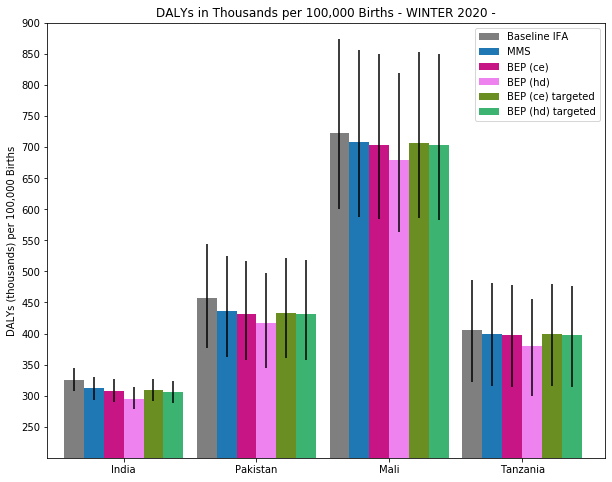

In [25]:
#DALYS all scenarios

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.15
w = 0.15

# bar heights

#baseline 1
baseline = master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() / 1_000
baseline_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000
baseline_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000

#mmn 2
mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna()/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000


#bep_ce_universal 3
bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() /1_000
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna())/ 1_000
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_ce_universal').dropna())/1_000

#bep_hd_universal 4
bep_hd_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() /1_000
bep_hd_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna())/ 1_000
bep_hd_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna())/1_000

#bep_ce_targeted 5
bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna()/1_000
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna())/1_000
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_ce_targeted').dropna())/1_000

#bep_hd_targeted 6
bep_hd_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna()/1_000
bep_hd_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna())/1_000
bep_hd_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna())/1_000



# x-values bar positions
# baseline_x         = [6*element + w*1 for element in range (4)] 
# mmn_x              = [6*element + w*2 for element in range (4)]
# bep_ce_universal_x = [6*element + w*3 for element in range (4)] 
# bep_ce_targeted_x  = [6*element + w*4 for element in range (4)]
# bep_hd_universal_x = [6*element + w*5 for element in range (4)]
# bep_hd_targeted_x  = [6*element + w*6 for element in range (4)]

baseline_x = np.arange(len(baseline)) 
mmn_x = [x + barWidth for x in baseline_x]
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_x]
bep_hd_targeted_x = [x + barWidth for x in bep_ce_targeted_x]

# plot
plt.figure(figsize=(10,8))

#---- note: yerrs should be lower, upper

# baseline
plt.bar(baseline_x, baseline, yerr=[baseline_lower, baseline_upper], width=barWidth, color='tab:grey', label='Baseline IFA')

#mmn
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, color='tab:blue',label='MMS')

#unicersal ce and hd
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, color='mediumvioletred', label='BEP (ce)')
plt.bar(bep_hd_universal_x, bep_hd_universal, yerr=[bep_hd_universal_lower, bep_hd_universal_upper], width=barWidth, color='violet', label='BEP (hd)')

#targeted ce and hd
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, color='olivedrab', label='BEP (ce) targeted')
plt.bar(bep_hd_targeted_x, bep_hd_targeted, yerr=[bep_hd_targeted_lower, bep_hd_targeted_upper], width=barWidth, color='mediumseagreen', label='BEP (hd) targeted')

plt.xticks([r + 2.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())

plt.axis([-0.2 , 4 , 200, 900])
plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births - WINTER 2020 -')

y = [baseline, mmn, bep_ce_universal, bep_hd_universal, bep_ce_targeted, bep_hd_targeted]
print(y)

plt.legend()
#plt.savefig('fig_DALYS')


# scenarios baseline, mmn, bep_hd_universal, bep_hd_targeted




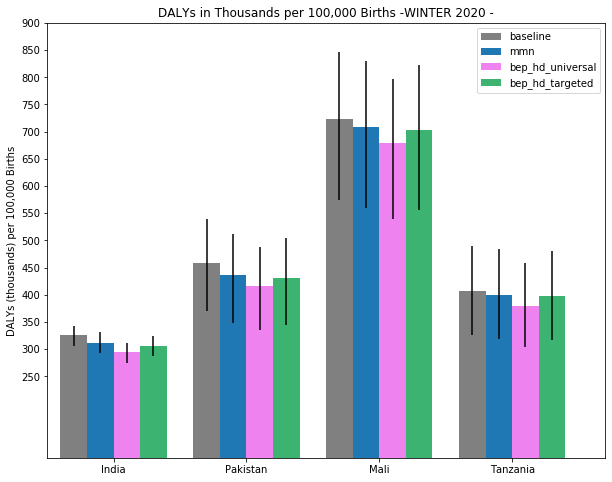

In [26]:
#baseline, mmn, bep_hd_universal_iii, bep_hd_targeted_iii

data = master_avg#.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.2

# bar heights
baseline = master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() / 1_000
baseline_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000
baseline_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_baseline').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_baseline').dropna())/ 1_000

mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna()/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_mmn').dropna())/ 1_000

bep = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() /1_000
bep_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna())/ 1_000
bep_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_universal').dropna())/1_000

bep_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna()/1_000
bep_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna())/1_000
bep_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_bep_hd_targeted').dropna())/1_000

# bar positions
baseline_x = np.arange(len(baseline)) 
mmn_x = [x + barWidth for x in baseline_x]
bep_x = [x + barWidth for x in mmn_x]
bep_targeted_x = [x + barWidth for x in bep_x]

# plot
plt.figure(figsize=(10,8))
plt.bar(baseline_x, baseline, yerr=[baseline_upper, baseline_lower], width=barWidth, color='grey', label='baseline')
plt.bar(mmn_x, mmn, yerr=[mmn_upper, mmn_lower], width=barWidth, color='tab:blue', label='mmn')
plt.bar(bep_x, bep, yerr=[bep_upper, bep_lower], width=barWidth, color='violet', label='bep_hd_universal')
plt.bar(bep_targeted_x, bep_targeted, yerr=[bep_targeted_upper, bep_targeted_lower], width=barWidth, color ='mediumseagreen',label='bep_hd_targeted')

#
plt.xticks([r + 1.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())
plt.axis([-0.2 , 4 , 100, 900])
plt.yticks([250,300,350,400,450,500,550,600,650,700,750,800,850,900])
plt.ylabel('DALYs (thousands) per 100,000 Births')
plt.title('DALYs in Thousands per 100,000 Births -WINTER 2020 -')
plt.legend(loc=1)


# -------------------------
# DALYs averted 
# -------------------------

[0    325.266498
0    457.449954
0    723.565862
0    405.973134
Name: mean, dtype: float64, 55    13.465658
55    20.868983
55    15.288128
55     5.985794
Name: mean, dtype: float64, 57    18.150177
57    26.545763
57    19.413380
57     7.625743
Name: mean, dtype: float64, 66    30.523114
66    41.171774
66    43.926568
66    26.246245
Name: mean, dtype: float64, 62    16.303410
62    23.631317
62    17.345973
62     6.891019
Name: mean, dtype: float64, 71    19.169104
71    26.127663
71    20.509785
71     8.888524
Name: mean, dtype: float64]


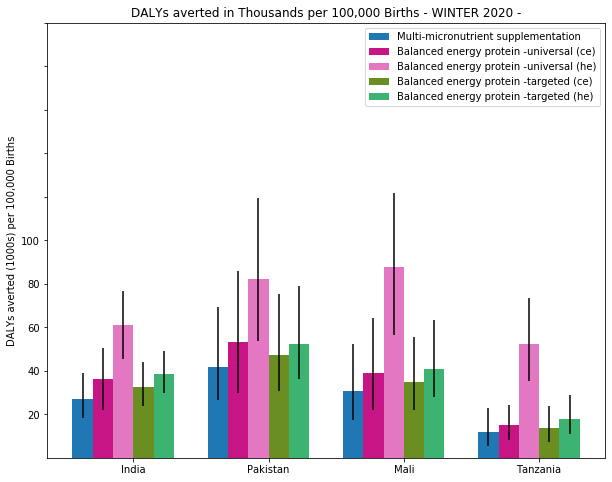

In [27]:
#DALYS AVERTED all scenarios

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()

# bar width
barWidth = 0.15
w = 0.15

# bar heights

#mmn 1
mmn = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna()*(-1)/ 1_000
mmn_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_mmn').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna())*(-1)/ 1_000
mmn_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_mmn').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_mmn').dropna())*(-1)/ 1_000


#bep_ce_universal 3
bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() *(-1)/1_000
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna())*(-1)/ 1_000
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_ce_universal').dropna())*(-1)/1_000

#bep_hd_universal 4
bep_hd_universal = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal').dropna() *(-1)/1_000
bep_hd_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal').dropna())*(-1)/ 1_000
bep_hd_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_hd_universal').dropna())*(-1)/1_000

#bep_ce_targeted 5
bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna()*(-1)/1_000
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna())*(-1)/1_000
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_ce_targeted').dropna())*(-1)/1_000

#bep_hd_targeted 6
bep_hd_targeted = master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted').dropna()*(-1)/1_000
bep_hd_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted').dropna() -  master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted').dropna())*(-1)/1_000
bep_hd_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted').dropna() -  master_avg['min'].where(master_avg['index'] == 'dalys_averted_bep_hd_targeted').dropna())*(-1)/1_000


# x-values bar positions
# baseline_x         = [6*element + w*1 for element in range (4)] 
# mmn_x              = [6*element + w*2 for element in range (4)]
# bep_ce_universal_x = [6*element + w*3 for element in range (4)] 
# bep_ce_targeted_x  = [6*element + w*4 for element in range (4)]
# bep_hd_universal_x = [6*element + w*5 for element in range (4)]
# bep_hd_targeted_x  = [6*element + w*6 for element in range (4)]

mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x  = [x + barWidth for x in bep_hd_universal_x]
bep_hd_targeted_x  = [x + barWidth for x in bep_ce_targeted_x]

# plot
plt.figure(figsize=(10,8))

#---- note: yerrs should be lower, upper

#mmn
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, color='tab:blue',label='Multi-micronutrient supplementation')

# universal ce and hd
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, color='mediumvioletred', label='Balanced energy protein -universal (ce)')

plt.bar(bep_hd_universal_x, bep_hd_universal, yerr=[bep_hd_universal_lower, bep_hd_universal_upper], width=barWidth, color='tab:pink', label='Balanced energy protein -universal (he)')

#targeted ce and hd
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, color='olivedrab', label='Balanced energy protein -targeted (ce)')
plt.bar(bep_hd_targeted_x, bep_hd_targeted, yerr=[bep_hd_targeted_lower, bep_hd_targeted_upper], width=barWidth, color='mediumseagreen', label='Balanced energy protein -targeted (he)')

plt.xticks([r + 2.5*barWidth for r in range(len(baseline))], master_avg['location'].where(master_avg['index'] == 'dalys_baseline').dropna())

#plt.axis([-0.2 , 4 , 200, 900])
plt.yticks([10,20,30,40,50,60,70,80,90,100],[20,40,60,80,100])
plt.ylabel('DALYs averted (1000s) per 100,000 Births')
plt.title('DALYs averted in Thousands per 100,000 Births - WINTER 2020 -')

y = [baseline, mmn, bep_ce_universal, bep_hd_universal, bep_ce_targeted, bep_hd_targeted]
print(y)

plt.legend()
#plt.savefig('fig_DALYS')

In [28]:
print(mmn)

55    13.465658
55    20.868983
55    15.288128
55     5.985794
Name: mean, dtype: float64


# ==================================================================================================================

# ICER BAR PLOTS

# ==================================================================================================================

# scenarios: mmn, bep_ce_universal, bep_universal_hd, bep_ce_targeted, bep_targeted_hd

[83    13.041705
83     9.251851
83    12.963465
83    43.564573
Name: mean, dtype: float64, 84     395.632273
84     262.988425
84     362.351923
84    1098.380120
Name: mean, dtype: float64, 90    229.763758
90    166.278946
90    154.680035
90    303.211949
Name: mean, dtype: float64, 87     81.865749
87     38.402361
87     51.273422
87    148.246862
Name: mean, dtype: float64, 93     69.000086
93     34.474028
93     42.719535
93    111.998078
Name: mean, dtype: float64]
[83    -5.325378
83    -4.144309
83    -6.364810
83   -23.933466
dtype: float64, array([-142.16793967, -109.84342639, -160.31867507, -527.0587473 ]), 66    -7.904023
66   -14.215799
66   -15.589056
66    -8.698771
dtype: float64, array([-26.24627319, -16.75297647, -22.77817644, -71.29831978]), 71   -4.222096
71   -7.922721
71   -6.572917
71   -3.525060
dtype: float64]
[83    -6.689891
83    -4.484404
83    -7.802142
83   -36.441217
dtype: float64, array([-216.64344235, -147.2948324 , -259.78917086, -687.61506412])

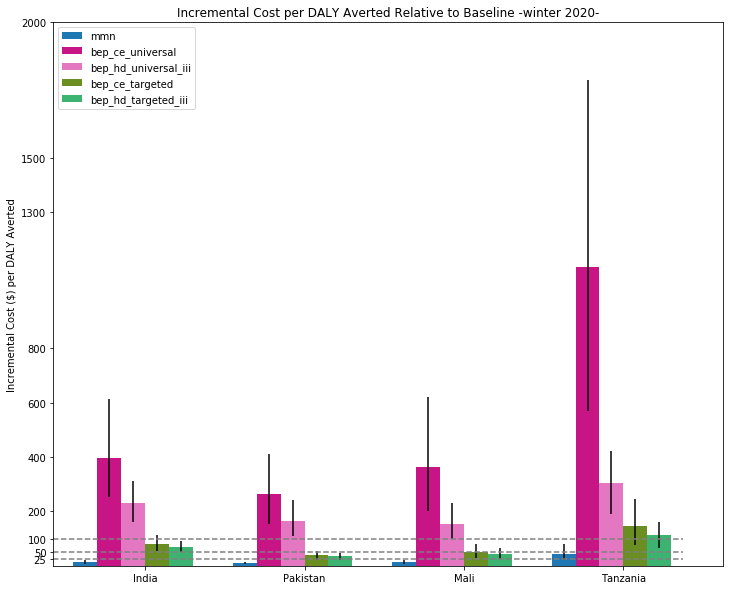

In [29]:
#LINEAR

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.15

# bar heights (y-axis) 
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_upper =  master_avg['max'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)

bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna()*(-1)
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))

bep_hd_universal_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna()*(-1)
bep_hd_universal_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1))
bep_hd_universal_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1))

bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna()*(-1)
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))

bep_hd_targeted_iii = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna()*(-1)
bep_hd_targeted_iii_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1))
bep_hd_targeted_iii_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1))


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# bar positions (for x-axis)
mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_iii_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_iii_x ]
bep_hd_targeted_iii_x = [x + barWidth for x in bep_ce_targeted_x]

# plot

plt.figure(figsize=(12,10))
plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, label = 'mmn')
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, label = 'bep_ce_universal', color = 'mediumvioletred')
plt.bar(bep_hd_universal_iii_x, bep_hd_universal_iii, yerr=[bep_hd_universal_iii_lower, bep_hd_universal_iii_upper], width=barWidth, label = 'bep_hd_universal_iii', color = 'tab:pink')
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, label = 'bep_ce_targeted', color = 'olivedrab')
plt.bar(bep_hd_targeted_iii_x, bep_hd_targeted_iii, yerr=[bep_hd_targeted_iii_lower, bep_hd_targeted_iii_upper], width=barWidth, label = 'bep_hd_targeted_iii', color = 'mediumseagreen')

plt.legend(loc='upper left')

threshold = 100
threshold2 = 50
threshold3 = 25
plt.plot([-0.25,len(mmn)-.25], [threshold, threshold],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')

#
plt.axis([-0.2 , 4 , 0, 1500])
plt.yticks([25,50,100,200,400,600,800,1300, 1500, 2000])
#plt.yscale('log') 
plt.xticks([r + 2.5*barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted')
plt.title('Incremental Cost per DALY Averted Relative to Baseline -winter 2020-')
#plt.savefig('fig_ICERS_baseline')

y = [mmn, bep_ce_universal, bep_hd_universal_iii, bep_ce_targeted, bep_hd_targeted_iii]
y_lower = [mmn_lower, bep_ce_universal_lower, bep_hd_universal_lower, bep_ce_targeted_lower, bep_hd_targeted_lower]
y_upper = [mmn_upper, bep_ce_universal_upper, bep_hd_universal_upper, bep_ce_targeted_upper, bep_hd_targeted_upper]

print(y)
print(y_upper)
print(y_lower)

In [30]:
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
np.log(mmn)

83    2.568152
83    2.224824
83    2.562135
83    3.774244
Name: mean, dtype: float64

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


[83    13.041705
83     9.251851
83    12.963465
83    43.564573
Name: mean, dtype: float64, 84     395.632273
84     262.988425
84     362.351923
84    1098.380120
Name: mean, dtype: float64, 90    229.763758
90    166.278946
90    154.680035
90    303.211949
Name: mean, dtype: float64, 87     81.865749
87     38.402361
87     51.273422
87    148.246862
Name: mean, dtype: float64, 93     69.000086
93     34.474028
93     42.719535
93    111.998078
Name: mean, dtype: float64]


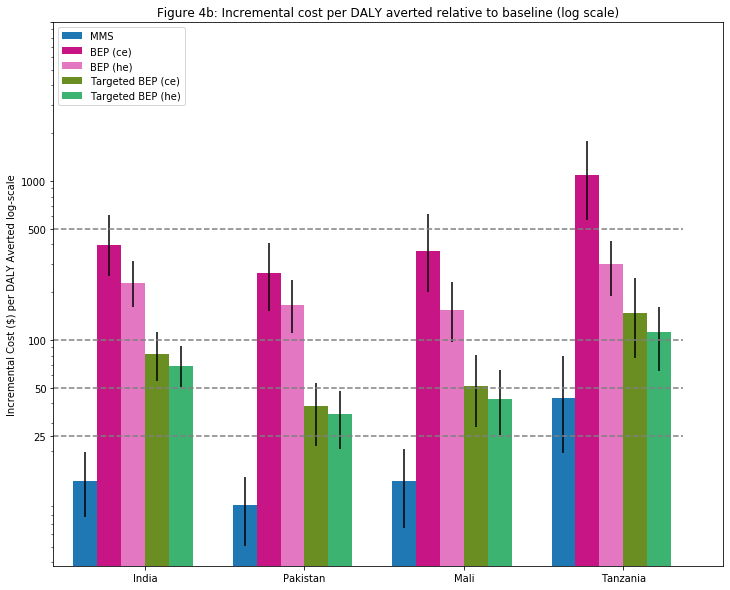

In [53]:
#LOG SCALE

data = master_avg #.where(master_avg['malnourishment_category'] == 'all').dropna()*(-1)

# bar width
barWidth = 0.15

# bar heights (y-axis) LOG
mmn = master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_upper =  master_avg['max'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)
mmn_lower =  master_avg['mean'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1) - master_avg['min'].where(master_avg['index'] == 'icer_mmn').dropna()*(-1)

#mmn = np.log(mmn)
# mmn_upper = np.log(mmn_upper)
# mmn_lower = np.log(mmn_lower)

bep_ce_universal = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna()*(-1)
bep_ce_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))
bep_ce_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_universal').dropna().values*(-1))

#bep_ce_universal = np.log(bep_ce_universal)
#bep_ce_universal_upper = np.log(bep_ce_universal_upper) 
#bep_ce_universal_lower = np.log(bep_ce_universal_lower)

bep_hd_universal = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna()*(-1)
bep_hd_universal_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1))
bep_hd_universal_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_universal').dropna().values*(-1))

#bep_hd_universal = np.log(bep_hd_universal)
#bep_hd_universal_upper = np.log(bep_hd_universal_upper)
#bep_hd_universal_lower = np.log(bep_hd_universal_lower)

bep_ce_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna()*(-1)
bep_ce_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))
bep_ce_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_ce_targeted').dropna().values*(-1))

#bep_ce_targeted = np.log(bep_ce_targeted)
#bep_ce_targeted_upper = np.log(bep_ce_targeted_upper)
#bep_ce_targeted_lower = np.log(bep_ce_targeted_lower)

bep_hd_targeted = master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna()*(-1)
bep_hd_targeted_upper =  (master_avg['max'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1) -  master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1))
bep_hd_targeted_lower =  (master_avg['mean'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1) -  master_avg['min'].where(master_avg['index'] == 'icer_bep_hd_targeted').dropna().values*(-1))

#bep_hd_targeted = np.log(bep_hd_targeted)
#bep_hd_targeted_upper = np.log(bep_hd_targeted_upper)
#bep_hd_targeted_lower = np.log(bep_hd_targeted_lower)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# bar positions (for x-axis)
mmn_x = np.arange(len(mmn)) 
bep_ce_universal_x = [x + barWidth for x in mmn_x]
bep_hd_universal_x = [x + barWidth for x in bep_ce_universal_x]
bep_ce_targeted_x = [x + barWidth for x in bep_hd_universal_x ]
bep_hd_targeted_x = [x + barWidth for x in bep_ce_targeted_x]

# plot

fig = plt.figure(figsize=(12,10))

plt.bar(mmn_x, mmn, yerr=[mmn_lower, mmn_upper], width=barWidth, label = 'MMS')
plt.bar(bep_ce_universal_x, bep_ce_universal, yerr=[bep_ce_universal_lower, bep_ce_universal_upper], width=barWidth, label = 'BEP (ce)', color = 'mediumvioletred')
plt.bar(bep_hd_universal_x, bep_hd_universal, yerr=[bep_hd_universal_lower, bep_hd_universal_upper], width=barWidth, label = 'BEP (he)', color = 'tab:pink')
plt.bar(bep_ce_targeted_x, bep_ce_targeted, yerr=[bep_ce_targeted_lower, bep_ce_targeted_upper], width=barWidth, label = 'Targeted BEP (ce)', color = 'olivedrab')
plt.bar(bep_hd_targeted_x, bep_hd_targeted, yerr=[bep_hd_targeted_lower, bep_hd_targeted_upper], width=barWidth, label = 'Targeted BEP (he)', color = 'mediumseagreen')

plt.legend(loc='upper left')

threshold4 = 500
threshold3 = 100
threshold2 = 50
threshold1 = 25

plt.plot([-0.25,len(mmn)-.25], [threshold1, threshold1],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold2, threshold2],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold3, threshold3],'k--', c='gray')
plt.plot([-0.25,len(mmn)-.25], [threshold4, threshold4],'k--', c='gray')

#
plt.yscale('log')
plt.axis([-0.2 , 4 , 0, 200])
plt.yticks([25,50,100,500,1000,10000],[25,50,100,500,1000]) #first argument says WHERE to put the ticks, second argument
#plt.yticklabels(['25','50','100','200','400','800',1600])

plt.xticks([r + 2.5*barWidth for r in range(len(mmn))], master_avg['location'].where(master_avg['index'] == 'icer_mmn').dropna())
plt.ylabel('Incremental Cost ($) per DALY Averted log-scale')
#plt.title('Incremental Cost per DALY Averted Relative to Baseline (log scale)')
#plt.savefig('fig_ICERS_baseline')

y = [mmn, bep_ce_universal, bep_hd_universal, bep_ce_targeted, bep_hd_targeted]
y_upper = [mmn_upper, bep_ce_universal_upper, bep_hd_universal_upper, bep_ce_targeted_upper, bep_hd_targeted_upper]
print(y)
plt.title('Figure 4b: Incremental cost per DALY averted relative to baseline (log scale)')
fig.savefig('/homes/nicoly/bep_results_data/Figure_4b_icer_log_scale.pdf', bbox_inches = 'tight')    